<a href="https://colab.research.google.com/github/shriya7ise/ActionDetectionforSignLanguage/blob/main/Titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d = pd.read_csv('/content/Titanic-Dataset.csv')
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
d.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Removing columns not necessary for survival prediction

In [ ]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
clean_d = d.drop(cols_to_drop, axis=1)
clean_d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
clean_d["Sex"]= le.fit_transform(clean_d["Sex"])

In [ ]:
clean_d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [ ]:
clean_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Replacing missing age with avg age

In [ ]:
clean_d = clean_d.fillna(clean_d['Age'].mean())
clean_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
input = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare' ]
output = ['Survived']

In [ ]:
X = clean_d[input]
y = clean_d[output]
X.shape, y.shape

((891, 6), (891, 1))

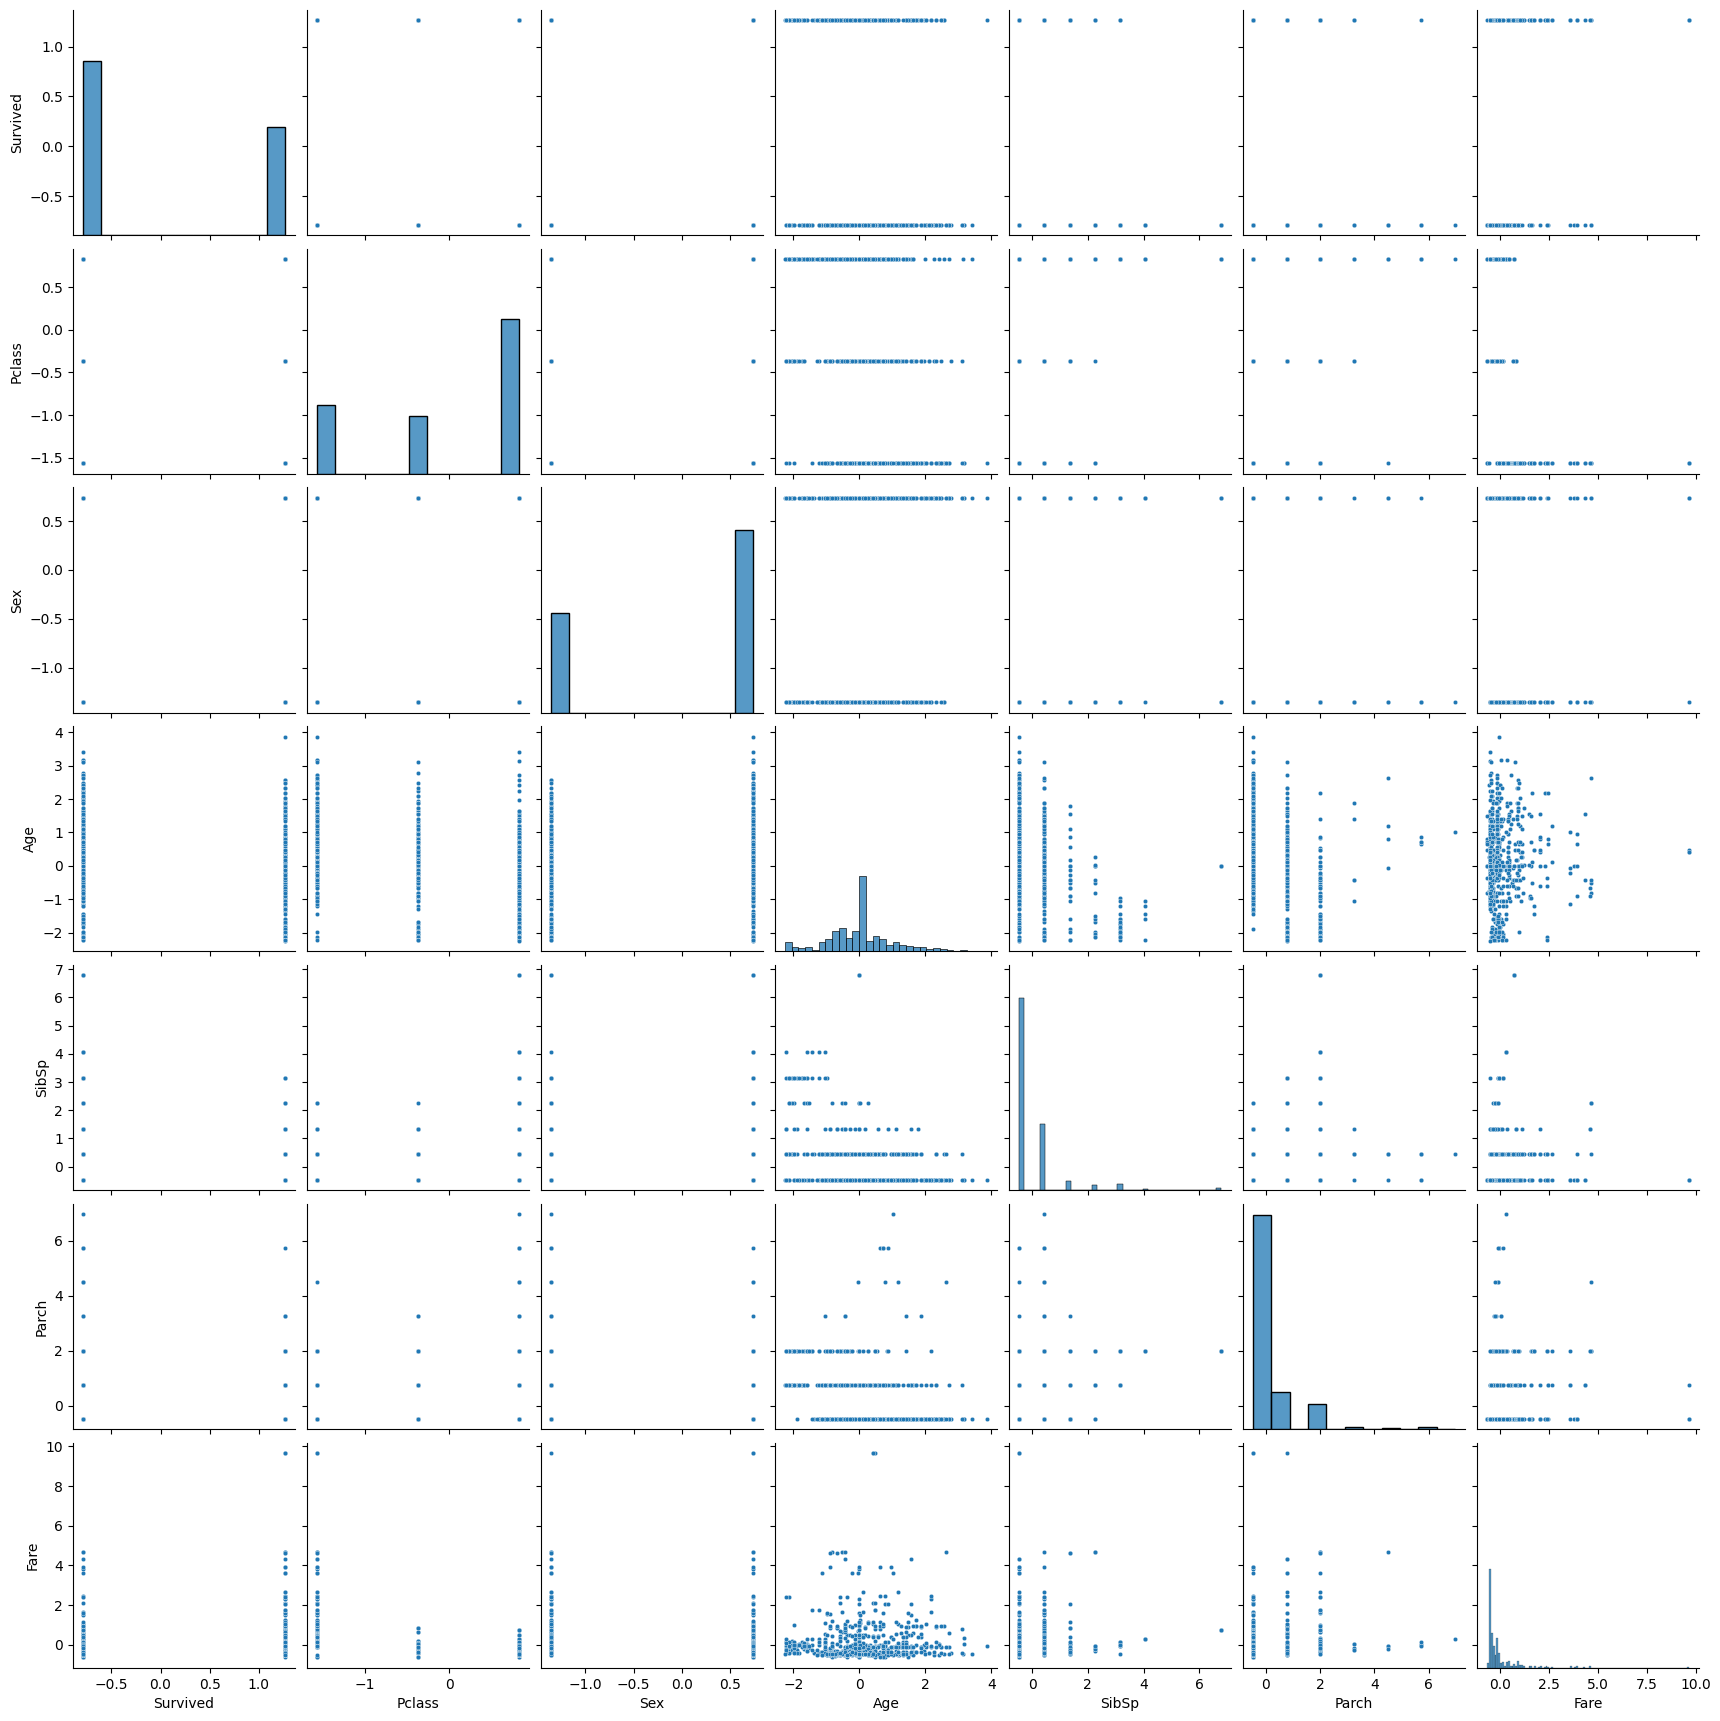

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Scale the features
sc = StandardScaler()
df_scaled = sc.fit_transform(df_numeric)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Plot pair plot
sns.pairplot(df_scaled, plot_kws={'s': 10})  # 's' sets the size of scatter plot markers
plt.show()

**Decision Tree Approach**

1. Entropy

In [ ]:
def entropy(col):
  d, counts = np.unique(col, return_counts =True)
  # Total items are also needed to find the prob
  N = float(col.shape[0])

  ent = 0.0 # Initial entropy

  for count in counts:
    p = count /N
    ent += p*np.log2(p)

    return -ent


from the below unique array we can find the prob like:


*   eg: probability = count / N
*   entropy = entropy + probability * log2(probability)

These two steps will be repeated for all the unique values of the array.


In [ ]:
np.unique([4,4,4,3,2,3,1,2,1,1], return_counts =True)
# unique() will return all the unique elements in the array provided
# return_counts will tell how many times each element ocuured in the array

(array([1, 2, 3, 4]), array([3, 2, 2, 3]))

In [ ]:
col = np.array([4,4,4,3,2,3,1,2,1,1])
entropy(col)

0.5210896782498619

2. Information gain

* Taking an eg: of PS5 , that whether a person will buy playstation or not .
1. split them across salary (hence, fkey(feature key)= salaries
    * say you want to split salary <10 lac (cannot buy-left child) and salary>10lac (can buy_ right child): (fval = 10)

In [ ]:
def divide_data( x_data, fkey , fval):
  x_right =pd.DataFrame([], columns = x_data.columns)
  x_left =pd.DataFrame([], columns = x_data.columns)

  for xi in range(x_data.shape[0]):
    val = x_data[fkey].iloc[xi] # this basically gives the salries row wise in the range of x_data

    if(val > fval):
      x_right = pd.concat([x_right, x_data.iloc[[xi]]], ignore_index=True)
    else:

      x_left = pd.concat([x_left, x_data.iloc[[xi]]], ignore_index=True)

  return x_left , x_right


In [ ]:
# we are making a binary tree , hence we need to split into 2.

def info_gain(x_data , fkey , fval ):
  left , right = divide_data(x_data, fkey , fval)

  # % of examples i right and left split
  l = float(left.shape[0])/ x_data.shape[0]
  r = float(right.shape[0])/ x_data.shape[0]

  hs =entropy(x_data.Survived)
  igain = hs - (l * entropy(left.Survived) + r * entropy(right.Survived))
  return igain

In [ ]:
for f in X.columns:
  print(f)
  print(info_gain(clean_d, f, clean_d[f].mean()))

Pclass
0.02961754532364458
Sex
0.09409671200231373
Age
0.00034181619069012514
SibSp
0.003814989560021409
Parch
0.006340453640985122
Fare
0.018173481486616072


Now we have to decide which can be the root node;
* The one with higher entropy will be or root node.
* in this dataset ,it is Sex

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
#sk_tree = DecisionTreeClassifier( criterion = 'entropy', max_depth =10)

In [ ]:
#clean_d.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [ ]:
#sk_tree.fit(X_train , y_train)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [5, 10, 15, 20]
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, None],
                         'min_samples_split': [5, 10, 15, 20]})

In [ ]:
grid_search.best_params_


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5}

In [ ]:
grid_search.best_estimator_.score(X_train, y_train)

0.8238255033557047

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

0.8203389830508474

In [ ]:
grid_search.predict(X_test[:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y_test[:10]


,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

#calcula

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-34-2f219f0e3ddd>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Accuracy: 0.8067796610169492


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


NameError: name 'y_test' is not defined

In [ ]:
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8068


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()



from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure scaling is only done within the pipeline
    ('log_reg', LogisticRegression())
])

# Define parameter grid for regularization parameter
param_grid = {
    'log_reg__C': [0.1, 1, 10, 100],  # Example values for C
    'log_reg__penalty': ['l2'],  # Using 'l2' which works with most solvers
    'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 1, 10, 100],
                         'log_reg__penalty': ['l2'],
                         'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                             'saga']},
             verbose=2)

In [ ]:
grid_search.best_params_

{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'log_reg__solver': 'newton-cg'}

In [ ]:
grid_search.best_estimator_.score(X_train, y_train)

0.7953020134228188

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

0.8169491525423729

##**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=11,metric ='euclidean' )

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pred = knn_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
cm1 = confusion_matrix(y_test , y_pred)
print(cm1)

[[157  18]
 [ 42  78]]


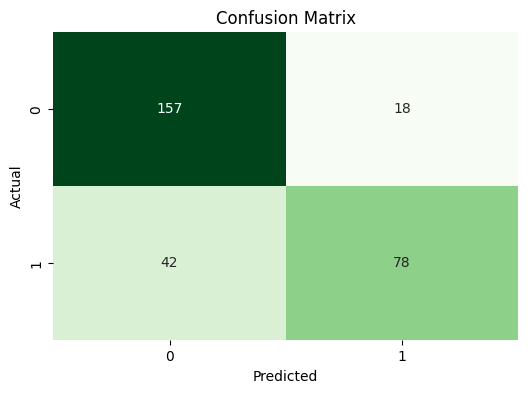

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.81      0.65      0.72       120

    accuracy                           0.80       295
   macro avg       0.80      0.77      0.78       295
weighted avg       0.80      0.80      0.79       295



In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
accuracy1 = np.trace(cm1) / np.sum(cm1)
print(f'Accuracy: {accuracy1:.9f}')

Accuracy: 0.796610169


## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')

In [ ]:
sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)

In [ ]:
svc_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
y_pred = svc_classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
cm2 = confusion_matrix(y_test , y_pred)
print(cm2)

[[151  24]
 [ 36  84]]


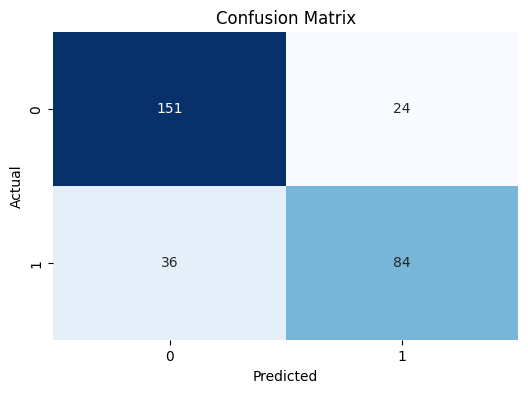

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       175
           1       0.78      0.70      0.74       120

    accuracy                           0.80       295
   macro avg       0.79      0.78      0.79       295
weighted avg       0.80      0.80      0.79       295



In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

#**Gradient Descent**

In [ ]:
df = clean_d
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000
